In [155]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Paleta de Cores

In [156]:
## Paleta 01 - 5 cores
RED1, GREEN1, GREEN2, YELLOW1, RED2 = "#EE6055", "#60D394", "#AAF683", "#FFD97D", "#FF9B85"
PALETA01 = [RED1, GREEN1, GREEN2, YELLOW1, RED2]

## Paleta 02 - 10 cores
VINHO1, VINHO2, VINHO3, VINHO4, VINHO5 =  "#590D22", "#800F2F", "#A4133C", "#C9184A", "#FF4D6D"
VINHO6, VINHO7, VINHO8, VINHO9, VINHO10 = "#FF758F", "#FF758F", "#FF758F", "#FF758F", "#FF758F"
PALETA02 = [VINHO1, VINHO2, VINHO3, VINHO4, VINHO5, VINHO6, VINHO7, VINHO8, VINHO9, VINHO10]

## Paleta 03 - Títulos
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'

### Exploração dos dados

In [157]:
dados = pd.read_csv("dados/ExpVinho.csv", sep = ";",encoding= "utf-8", thousands  = ".")

In [158]:
dados.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,4,Angola,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Columns: 106 entries, Id to 2021.1
dtypes: int64(105), object(1)
memory usage: 102.8+ KB


In [160]:
col_pais = dados[["País"]]
col_pais.head()

,País
0,Afeganistão
1,África do Sul
2,"Alemanha, República Democrática"
3,Angola
4,Anguilla


In [161]:
dados_15anos = dados[dados.columns[-30:]]
cols = dados_15anos.columns.str.replace(".1", "-Dolar")
dados_15anos.columns = cols
dados_15anos.head()

,2007,2007-Dolar,2008,2008-Dolar,2009,2009-Dolar,2010,2010-Dolar,2011,2011-Dolar,...,2017,2017-Dolar,2018,2018-Dolar,2019,2019-Dolar,2020,2020-Dolar,2021,2021-Dolar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,...,10170,61680,477,709,345,1065,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
dados_dolar = dados_15anos[dados_15anos.columns[1::2]]
dados_dolar = col_pais.join(dados_dolar)
dados_dolar.head()

,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0
2,"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741
3,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
dados_dolar["Total"] = dados_dolar.iloc[:,2:].sum(axis = 1)
dados_dolar.head()

,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116
2,"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2501027
3,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,571428
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [164]:
dados_dolar["País"].unique()
dados_dolar.loc[dados_dolar["País"] == "Alemanha, República Democrática", "País"] = "Alemanha"
dados_dolar.loc[dados_dolar["País"] == "Coreia, Republica Sul", "País"] = "Coreia do Sul"
dados_dolar.loc[dados_dolar["País"] == "Eslovaca, Republica", "País"] = "Eslováquia"
dados_dolar.loc[dados_dolar["País"] == "Taiwan (FORMOSA)", "País"] = "Taiwan"
dados_dolar.loc[dados_dolar["País"] == "Tcheca, República", "País"] = "Chéquia"

In [165]:
dados_dolar

,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116
2,Alemanha,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2501027
3,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,571428
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4
120,Uruguai,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,222511
121,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,31
122,Venezuela,27370,0,0,0,0,7492,0,232,0,0,2646,355,0,9808,35944,56477


In [166]:
dados_dolar["País"].unique()

array(['Afeganistão', 'África do Sul', 'Alemanha', 'Angola', 'Anguilla',
       'Antígua e Barbuda', 'Antilhas Holandesas', 'Argentina', 'Aruba',
       'Austrália', 'Áustria', 'Bahamas', 'Bangladesh', 'Barbados',
       'Barein', 'Bélgica', 'Belice', 'Benin', 'Bolívia',
       'Bósnia-Herzegovina', 'Brasil', 'Bulgária', 'Cabo Verde',
       'Camarões', 'Canadá', 'Catar', 'Cayman, Ilhas', 'Chile', 'China',
       'Chipre', 'Cingapura', 'Colômbia', 'Comores', 'Congo',
       'Coreia do Sul', 'Costa do Marfim', 'Costa Rica', 'Croácia',
       'Cuba', 'Curaçao', 'Dinamarca', 'Dominica', 'El Salvador',
       'Emirados Arabes Unidos', 'Equador', 'Eslováquia', 'Espanha',
       'Estados Unidos', 'Estônia', 'Filipinas', 'Finlândia', 'França',
       'Gana', 'Gibraltar', 'Grécia', 'Guatemala', 'Guiana',
       'Guiana Francesa', 'Guine Bissau', 'Guine Equatorial', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungria', 'Ilha de Man', 'Ilhas Virgens',
       'India', 'Indonésia', 'Irã', 'Iraque', 

In [167]:
dados_pais_continente = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal", match = "País/Território",
                flavor="lxml", header=2)[0]
dados_pais_continente.head()

,Mundo,—,"101,560,901",2022,"96,100,091",2021,"85,328,323",2020
0,Estados Unidos,América,26854599,2023,22996100,2021,20893746,2020
1,China,Ásia,19912753,[n 1]2023,17734063,[n 2]2021,14722801,[n 1]2020
2,Japão,Ásia,4428183,2023,4937422,2021,5057759,2020
3,Alemanha,Europa,4308854,2023,4223116,2021,3846414,2020
4,Índia,Ásia,3773102,2023,3173398,2021,2664749,2020


In [168]:
dados_pais_continente = dados_pais_continente[dados_pais_continente.columns[:2]]
dados_pais_continente.columns = ["País", "Continente"]
dados_pais_continente["Continente"] = dados_pais_continente["Continente"].str.replace("Africa", "África")
dados_pais_continente["Continente"] = dados_pais_continente["Continente"].str.replace("Europa/Ásia", "Europa")
dados_pais_continente

,País,Continente
0,Estados Unidos,América
1,China,Ásia
2,Japão,Ásia
3,Alemanha,Europa
4,Índia,Ásia
...,...,...
211,Palau,Oceania
212,Kiribati,Oceania
213,Nauru,Oceania
214,Montserrat,América


In [169]:
dados_dolar_combinado = dados_dolar.merge(dados_pais_continente[["País","Continente"]],on = "País")
dados_dolar_combinado

,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total,Continente
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46,Ásia
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116,África
2,Alemanha,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2501027,Europa
3,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,571428,África
4,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,5872,América
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Turquia,0,0,0,0,0,0,0,0,0,0,0,150,209,0,878,1237,Ásia
92,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,Oceania
93,Uruguai,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,222511,América
94,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,31,Oceania


In [170]:
dados_dolar_anual_total = dados_dolar_combinado.copy()
dados_dolar_anual_total.columns = dados_dolar_anual_total.columns.str.replace("-Dolar","")
export_por_ano = dados_dolar_anual_total.iloc[:,1:-2].sum().to_frame().rename(columns={0: "Total"})
export_por_ano["Total"] = (export_por_ano["Total"] / 1e6).round(2)
export_por_ano.head(3)

,Total
2007,3.58
2008,6.99
2009,8.87


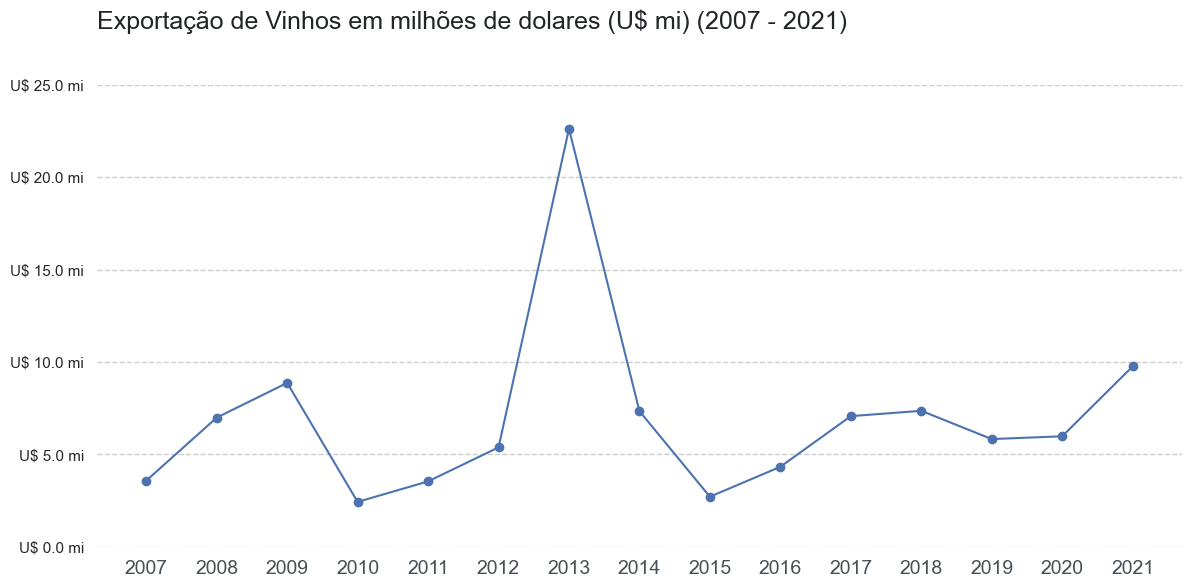

In [185]:
# Definindo a área do gráfico e o tema da visualização
fig, ax = plt.subplots(figsize=(14,6))

# Desenhando o gráfico
ax.plot(export_por_ano.index, export_por_ano["Total"], marker="o")

 # Personalizando o gráfico
ax.set_title('Exportação de Vinhos em milhões de dolares (U$ mi) (2007 - 2021)', 
             loc='left', fontsize=18, color = CINZA1, pad = 40)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("U$ {x} mi"))
ax.grid(axis = "y", linestyle="--", lw = 1)
ax.set_ylim(0, 25)
sns.despine(left= True, bottom = True)

plt.show()

In [106]:
vendas_por_continente = dados_dolar_combinado.groupby("Continente").sum()[["Total"]]
vendas_por_continente = vendas_por_continente.sort_values("Total", ascending=False)
vendas_por_continente = (vendas_por_continente / 1e6).round(1)
vendas_por_continente = vendas_por_continente.reset_index()
vendas_por_continente

,Continente,Total
0,Europa,46.1
1,América,45.0
2,Ásia,7.5
3,África,1.0
4,Oceania,0.5


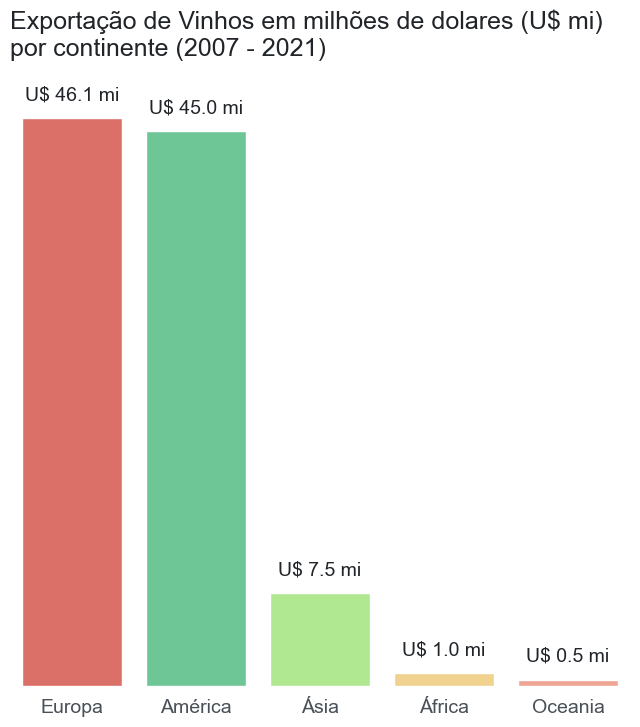

In [122]:
# Definindo a área do gráfico e o tema da visualização
fig, ax = plt.subplots(figsize=(8,8))
sns.set_theme(style="white")

# Desenhando o gráfico
ax = sns.barplot(data = vendas_por_continente , x = "Continente", y= "Total", palette = PALETA01)

 # Personalizando o gráfico
ax.set_title('Exportação de Vinhos em milhões de dolares (U$ mi)\npor continente (2007 - 2021)', 
             loc='left', fontsize=18, color = CINZA1, pad = 10)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("U$ {x} mi"))
ax.set_ylim(0, 50)
ax.set_yticklabels([])
sns.despine(left= True, bottom = True)

# Adicionando os valores
for container in ax.containers:
  labels = [f'U$ {valor.get_height()} mi' for valor in container]
  ax.bar_label(container, label_type="edge", labels = labels, size = 14, color = CINZA1, padding = 10)

plt.show()

In [18]:
dados_dolar_ordenados = dados_dolar_combinado.sort_values("Total", axis= 0 , ascending= False)
dados_dolar_ordenados.head()

,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total,Continente
70,Paraguai,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,31562738,América
76,Rússia,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,25385866,Europa
36,Estados Unidos,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,9236674,América
74,Reino Unido,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,4573310,Europa
21,China,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,4341878,Ásia


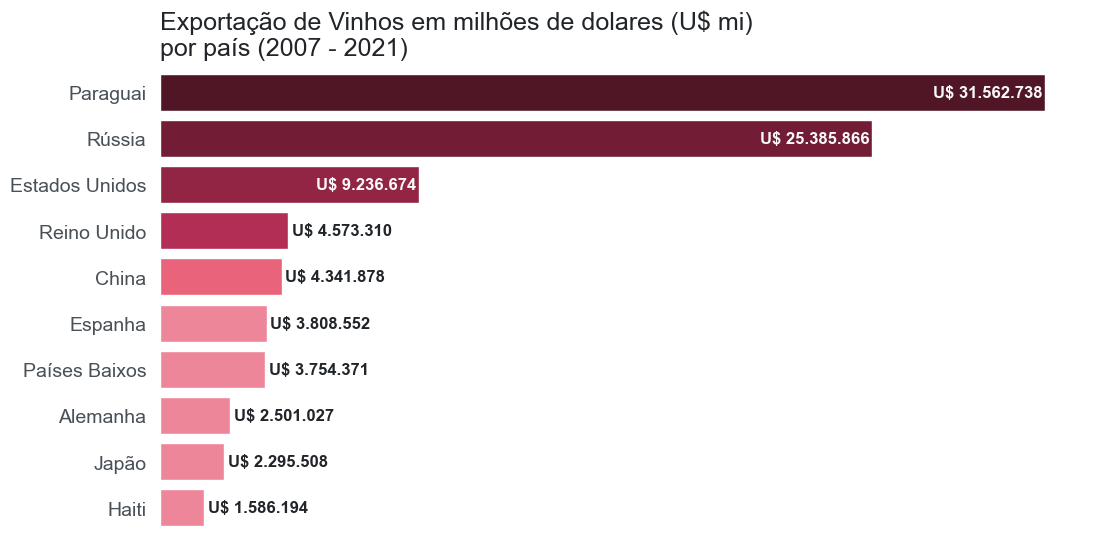

In [205]:
# Definindo a área do gráfico e o tema da visualização
fig, ax = plt.subplots(figsize=(12,6))
sns.set_theme(style="white")

# Desenhando o gráfico
data = dados_dolar_ordenados.head(10)
ax = sns.barplot(data = data, y = "País", x = "Total", palette = PALETA02)

 # Personalizando o gráfico
ax.set_title('Exportação de Vinhos em milhões de dolares (U$ mi)\npor país (2007 - 2021)', 
             loc='left', fontsize=18, color = CINZA1, pad = 10)
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
ax.set_xticklabels([])
sns.despine(left= True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(data["Total"]):
    qtd = f'U$ {valor:,.0f}'.replace(',','.')
    offset = 1e5  # offset de 1.000
    offset_fora = 3.7e6
    if valor > 5e6:
      ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=12, fontweight='bold', ha='right', va='center')
    else:
       ax.text(valor + offset_fora, i, qtd, color= CINZA1, fontsize=12, fontweight='bold', ha='right', va='center')
      

plt.show()

In [20]:
dados_dolar_combinado.head()

,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total,Continente
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46,Ásia
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116,África
2,Alemanha,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2501027,Europa
3,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,571428,África
4,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,5872,América


## Vendas por continente de 2007 a 2021

In [21]:
dados_dolar_anual = dados_dolar_combinado.copy()
cols = dados_dolar_anual.columns.str.replace("-Dolar","")
dados_dolar_anual.columns = cols
dados_dolar_anual = dados_dolar_anual.melt(id_vars = "Continente", value_vars=dados_dolar_anual.columns[1:16], var_name="Ano", value_name="Vendas_Dolar")
dados_dolar_anual.head()

,Continente,Ano,Vendas_Dolar
0,Ásia,2007,0
1,África,2007,0
2,Europa,2007,238052
3,África,2007,49753
4,América,2007,0


In [22]:
# Criando uma tabela cruzada (crosstab) com os valores de venda por ano por continente
vendas_por_ano = pd.crosstab(index = dados_dolar_anual.Ano, columns = dados_dolar_anual.Continente, 
                             values = dados_dolar_anual.Vendas_Dolar, aggfunc="sum")

vendas_por_ano = vendas_por_ano / 1e6

vendas_por_ano.head()

Continente,América,Europa,Oceania,África,Ásia
Ano,,,,,
2007,1.760867,1.406368,0.000281,0.049764,0.365141
2008,2.267468,4.257593,0.099280,0.115445,0.250764
2009,1.174108,6.810480,0.009195,0.084350,0.793024
2010,0.952470,1.140144,0.017960,0.239257,0.076986
2011,1.561014,1.358602,0.048696,0.070606,0.498104


In [23]:
# Importando a biblioteca
import plotly.express as px

fig = px.line(vendas_por_ano, x=vendas_por_ano.index, y=vendas_por_ano.columns, markers = True)

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= "grey", title_font_color= "black", title_font_size=24,
                  title_text='Vendas de vinho por continente' +
                             '<br><sup size=1 style="color:#555655">De 2007 a 2021</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= "#f8f9fa")

# Ajustando os ticks do eixo y para o formato em milhões
fig.update_yaxes(tickprefix="U$ ", ticksuffix=" Mi")

fig.update_xaxes(tickmode='array', tickvals=np.arange(2007,2022,2))

fig.show()

## Vendas nos Top 5 países que mais consomem de 2007 a 2021

In [24]:
dados_dolar_anual_paises = dados_dolar_combinado.copy()
dados_dolar_anual_paises.columns = dados_dolar_anual_paises.columns.str.replace("-Dolar","")
dados_dolar_anual_paises = dados_dolar_anual_paises.sort_values("Total", axis= 0 , ascending= False)
dados_dolar_anual_paises = dados_dolar_anual_paises[:5]
dados_dolar_anual_paises

,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total,Continente
70,Paraguai,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,31562738,América
76,Rússia,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,25385866,Europa
36,Estados Unidos,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,9236674,América
74,Reino Unido,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,4573310,Europa
21,China,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,4341878,Ásia


In [25]:
dados_dolar_anual_paises = dados_dolar_anual_paises.melt(id_vars = "País", value_vars=dados_dolar_anual_paises.columns[1:16], var_name="Ano", value_name="Vendas_Dolar")
dados_dolar_anual_paises.head()

,País,Ano,Vendas_Dolar
0,Paraguai,2007,801519
1,Rússia,2007,173160
2,Estados Unidos,2007,810038
3,Reino Unido,2007,144244
4,China,2007,30390


In [26]:
# Criando uma tabela cruzada (crosstab) com os valores de venda por ano por continente
vendas_por_ano_paises = pd.crosstab(index = dados_dolar_anual_paises.Ano, columns = dados_dolar_anual_paises["País"], 
                             values = dados_dolar_anual_paises.Vendas_Dolar, aggfunc="sum")

vendas_por_ano_paises = vendas_por_ano_paises / 1e6

vendas_por_ano_paises.head()

País,China,Estados Unidos,Paraguai,Reino Unido,Rússia
Ano,,,,,
2007,0.030390,0.810038,0.801519,0.144244,0.173160
2008,0.025926,0.804607,1.374088,0.155076,2.352768
2009,0.482400,0.660066,0.392087,0.068788,5.732280
2010,0.002358,0.478630,0.449197,0.295690,0.000000
2011,0.334867,1.030254,0.276281,0.285642,0.000000


In [27]:
# Importando a biblioteca
import plotly.express as px

fig = px.line(vendas_por_ano_paises, x=vendas_por_ano_paises.index, y=vendas_por_ano_paises.columns, markers = True)

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= "grey", title_font_color= "black", title_font_size=24,
                  title_text='Vendas de vinho nos Top 5 países que mais consomem' +
                             '<br><sup size=1 style="color:#555655">De 2007 a 2021</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= "#f8f9fa")

# Ajustando os ticks do eixo y para o formato em milhões
fig.update_yaxes(tickprefix="U$ ", ticksuffix=" Mi")

fig.update_xaxes(tickmode='array', tickvals=np.arange(2007,2022,2))

fig.show()

## Quantidade de vinho de mesa vendido por continente em litros de 2007 a 2021

In [28]:
dados.head(3)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741


In [29]:
col_pais = dados[["País"]]
dados_15anos = dados[dados.columns[-30:]]
dados_qtd = dados_15anos[dados_15anos.columns[::2]]
dados_qtd = col_pais.join(dados_qtd)
dados_qtd["Total"] = dados_qtd.iloc[:,1:].sum(axis = 1)
dados_qtd.head()

,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0,30
2,"Alemanha, República Democrática",119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,1020933
3,Angola,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,190731
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
dados_qtd.loc[dados_qtd["País"] == "Alemanha, República Democrática", "País"] = "Alemanha"
dados_qtd.loc[dados_qtd["País"] == "Coreia, Republica Sul", "País"] = "Coreia do Sul"
dados_qtd.loc[dados_qtd["País"] == "Eslovaca, Republica", "País"] = "Eslováquia"
dados_qtd.loc[dados_qtd["País"] == "Taiwan (FORMOSA)", "País"] = "Taiwan"
dados_qtd.loc[dados_qtd["País"] == "Tcheca, República", "País"] = "Chéquia"
dados_qtd.head()

,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0,30
2,Alemanha,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,1020933
3,Angola,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,190731
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
dados_qtd_combinado = dados_qtd.merge(dados_pais_continente[["País","Continente"]],on = "País")
dados_qtd_combinado.head()

,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total,Continente
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,Ásia
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0,30,África
2,Alemanha,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,1020933,Europa
3,Angola,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,190731,África
4,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,37,219,624,805,1685,América


In [32]:
dados_qtd_anual = dados_qtd_combinado.melt(id_vars = "Continente", value_vars=dados_qtd_combinado.columns[1:16], var_name="Ano", value_name="Vendas_Litros")
dados_qtd_anual.head()

,Continente,Ano,Vendas_Litros
0,Ásia,2007,0
1,África,2007,0
2,Europa,2007,119512
3,África,2007,25931
4,América,2007,0


In [33]:
# Criando uma tabela cruzada (crosstab) com os valores de venda por ano por continente
vendas_por_ano_qtd = pd.crosstab(index = dados_qtd_anual.Ano, columns = dados_qtd_anual.Continente, 
                             values = dados_qtd_anual.Vendas_Litros, aggfunc="sum")

# vendas_por_ano_qtd = vendas_por_ano_qtd / 1e6

vendas_por_ano_qtd.head()

Continente,América,Europa,Oceania,África,Ásia
Ano,,,,,
2007,1867448,901901,60,25942,373809
2008,2663022,7093754,218726,56609,256962
2009,925453,22685787,1014,54827,1821709
2010,749419,312891,1823,45548,112973
2011,616560,392094,6219,14903,161554


In [34]:
# Importando a biblioteca
import plotly.express as px

fig = px.line(vendas_por_ano_qtd, x=vendas_por_ano_qtd.index, y=vendas_por_ano_qtd.columns, markers = True)

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= "grey", title_font_color= "black", title_font_size=24,
                  title_text='Quantidade de vinho de mesa exportado por continente em litros' +
                             '<br><sup size=1 style="color:#555655">De 2007 a 2021</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= "#f8f9fa")

#Ajustando os ticks do eixo y para litros
fig.update_yaxes(ticksuffix=" Litros")

fig.update_xaxes(tickmode='array', tickvals=np.arange(2007,2022,2))

fig.show()

## Quantidade de vinho de mesa vendido por país em litros de 2007 a 2021

In [35]:
dados_qtd_combinado.head(3)

,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total,Continente
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,Ásia
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0,30,África
2,Alemanha,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,1020933,Europa


In [36]:
dados_qtd_anual_paises = dados_qtd_combinado.copy()
dados_qtd_anual_paises = dados_qtd_anual_paises.sort_values("Total", axis= 0 , ascending= False)
dados_qtd_anual_paises = dados_qtd_anual_paises[:5]
dados_qtd_anual_paises

,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total,Continente
76,Rússia,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,39230153,Europa
70,Paraguai,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,25423559,América
36,Estados Unidos,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,3822251,América
21,China,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,2411701,Ásia
35,Espanha,0,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,1993000,Europa


In [37]:
dados_qtd_anual_paises = dados_qtd_anual_paises.melt(id_vars = "País", value_vars=dados_qtd_combinado.columns[1:16], var_name="Ano", value_name="Vendas_Litros")
dados_qtd_anual_paises.head()

,País,Ano,Vendas_Litros
0,Rússia,2007,266400
1,Paraguai,2007,1285459
2,Estados Unidos,2007,479269
3,China,2007,7638
4,Espanha,2007,0


In [38]:
# Criando uma tabela cruzada (crosstab) com os valores de venda por ano por continente
vendas_por_ano_qtd_paises = pd.crosstab(index = dados_qtd_anual_paises.Ano, columns = dados_qtd_anual_paises["País"], 
                             values = dados_qtd_anual.Vendas_Litros, aggfunc="sum")

# vendas_por_ano_qtd_paises = vendas_por_ano_qtd_paises / 1e6

vendas_por_ano_qtd_paises.head()

País,China,Espanha,Estados Unidos,Paraguai,Rússia
Ano,,,,,
2007,25931,0,119512,0,0
2008,0,0,60,0,0
2009,4985,0,1077,0,0
2010,4172,0,0,0,0
2011,0,0,0,7638,60930


In [39]:
# Importando a biblioteca
import plotly.express as px

fig = px.line(vendas_por_ano_qtd, x=vendas_por_ano_qtd.index, y=vendas_por_ano_qtd.columns, markers = True)

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= "grey", title_font_color= "black", title_font_size=24,
                  title_text='Quantidade de vinho de mesa exportado por país em litros' +
                             '<br><sup size=1 style="color:#555655">De 2007 a 2021</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= "#f8f9fa")

# Ajustando os ticks do eixo y para litros
fig.update_yaxes(ticksuffix=" Litros")

fig.update_xaxes(tickmode='array', tickvals=np.arange(2007,2022,2))

fig.show()

## Distribuição por continente das vendas de vinhos de mesa (2007 e 2021)

In [40]:
dados_dolar_anual["Ano"] = dados_dolar_anual["Ano"].astype("int64")

In [41]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP)
fig = px.treemap(dados_dolar_anual.query("Ano == 2007"),
                 path=[px.Constant("Em 2007"), 'Continente'],
                 values='Vendas_Dolar', color='Continente', title='Distribuição por continente das vendas de vinhos de mesa',
                 color_discrete_map={'(?)': "white"})

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=400, margin = dict(t=50, l=25, r=25, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= "grey", title_font_color= "black", title_font_size=24)

fig.update_traces(hovertemplate='<b>Vendas:</b> = U$ %{value}')

fig.add_annotation(text='Fonte dos dados: <a href="http://vitibrasil.cnpuv.embrapa.br/index.php">'
                        'Dados da Vitivinicultura (Embrapa Uva e Vinho)</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.03, showarrow=False, font_size=12)
fig.show()

In [42]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP)
fig = px.treemap(dados_dolar_anual.query("Ano == 2021"),
                 path=[px.Constant("Em 2021"), 'Continente'],
                 values='Vendas_Dolar', color='Continente', title='Distribuição por continente das vendas de vinhos de mesa',
                 color_discrete_map={'(?)': "white"})

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=400, margin = dict(t=50, l=25, r=25, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= "grey", title_font_color= "black", title_font_size=24)

fig.update_traces(hovertemplate='<b>Vendas:</b> = U$ %{value}')

fig.add_annotation(text='Fonte dos dados: <a href="http://vitibrasil.cnpuv.embrapa.br/index.php">'
                        'Dados da Vitivinicultura (Embrapa Uva e Vinho)</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.03, showarrow=False, font_size=12)
fig.show()

## Distribuição por top 10 países das vendas de vinhos de mesa (2007 e 2021)

In [43]:
dados_dolar_anual_paises = dados_dolar_combinado.copy()
dados_dolar_anual_paises.columns = dados_dolar_anual_paises.columns.str.replace("-Dolar","")
dados_dolar_anual_paises = dados_dolar_anual_paises.sort_values("Total", axis= 0 , ascending= False)
dados_dolar_anual_paises = dados_dolar_anual_paises[:10]
dados_dolar_anual_paises

,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total,Continente
70,Paraguai,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,31562738,América
76,Rússia,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,25385866,Europa
36,Estados Unidos,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,9236674,América
74,Reino Unido,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,4573310,Europa
21,China,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,4341878,Ásia
35,Espanha,0,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,3808552,Europa
68,Países Baixos,364751,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031,1532,8484,3754371,Europa
2,Alemanha,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2501027,Europa
54,Japão,316867,178333,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642,92674,90275,2295508,Ásia
44,Haiti,0,20,5863,3750,0,0,0,0,0,0,0,144425,129803,471152,831181,1586194,América


In [44]:
dados_dolar_anual_paises = dados_dolar_anual_paises.melt(id_vars = "País", value_vars=dados_dolar_anual_paises.columns[1:16], var_name="Ano", value_name="Vendas_Dolar")
dados_dolar_anual_paises["Ano"] = dados_dolar_anual_paises["Ano"].astype("int64")
dados_dolar_anual_paises.head()

,País,Ano,Vendas_Dolar
0,Paraguai,2007,801519
1,Rússia,2007,173160
2,Estados Unidos,2007,810038
3,Reino Unido,2007,144244
4,China,2007,30390


In [45]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP)
fig = px.treemap(dados_dolar_anual_paises.query("Ano == 2007"),
                 path=[px.Constant("Em 2007"), 'País'],
                 values='Vendas_Dolar', color='País', title='Distribuição por país das vendas de vinhos de mesa',
                 color_discrete_map={'(?)': "white"})

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=400, margin = dict(t=50, l=25, r=25, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= "grey", title_font_color= "black", title_font_size=24)

fig.update_traces(hovertemplate='<b>Vendas:</b> = U$ %{value}')

fig.add_annotation(text='Fonte dos dados: <a href="http://vitibrasil.cnpuv.embrapa.br/index.php">'
                        'Dados da Vitivinicultura (Embrapa Uva e Vinho)</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.03, showarrow=False, font_size=12)
fig.show()

In [46]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP)
fig = px.treemap(dados_dolar_anual_paises.query("Ano == 2021"),
                 path=[px.Constant("Em 2021"), 'País'],
                 values='Vendas_Dolar', color='País', title='Distribuição por país das vendas de vinhos de mesa',
                 color_discrete_map={'(?)': "white"})

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=400, margin = dict(t=50, l=25, r=25, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= "grey", title_font_color= "black", title_font_size=24)

fig.update_traces(hovertemplate='<b>Vendas:</b> = U$ %{value}')

fig.add_annotation(text='Fonte dos dados: <a href="http://vitibrasil.cnpuv.embrapa.br/index.php">'
                        'Dados da Vitivinicultura (Embrapa Uva e Vinho)</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.03, showarrow=False, font_size=12)
fig.show()

## Distribuição por top 10 países das vendas de vinhos de mesa (2007 a 2021)

In [47]:
dados_dolar_paises_total = dados_dolar_anual_paises.groupby("País").sum()[["Vendas_Dolar"]]
dados_dolar_paises_total = dados_dolar_paises_total.reset_index()
dados_dolar_paises_total = dados_dolar_paises_total.sort_values(by = "Vendas_Dolar", ascending=False)
dados_dolar_paises_total

,País,Vendas_Dolar
6,Paraguai,32364257
9,Rússia,25559026
3,Estados Unidos,10046712
8,Reino Unido,4717554
1,China,4372268
7,Países Baixos,4119122
2,Espanha,3808552
0,Alemanha,2739079
5,Japão,2612375
4,Haiti,1586194


In [48]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP)
fig = px.treemap(dados_dolar_paises_total,
                 path=[px.Constant("2007 a 2021"), 'País'],
                 values='Vendas_Dolar', color='País', title='Distribuição por país das vendas de vinhos de mesa',
                 color_discrete_map={'(?)': "white"})

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=400, margin = dict(t=50, l=25, r=25, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= "grey", title_font_color= "black", title_font_size=24)

fig.update_traces(hovertemplate='<b>Vendas:</b> = U$ %{value}')

fig.add_annotation(text='Fonte dos dados: <a href="http://vitibrasil.cnpuv.embrapa.br/index.php">'
                        'Dados da Vitivinicultura (Embrapa Uva e Vinho)</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.03, showarrow=False, font_size=12)
fig.show()

## Top 10 países global distribuídos ano a ano (2007 a 2021)

In [54]:
selecao_pais = dados_dolar_paises_total["País"].to_list()

In [60]:
top10_ano = dados_dolar_anual_paises.query("País == @selecao_pais")
top10_ano.head(3)

,País,Ano,Vendas_Dolar
0,Paraguai,2007,801519
1,Rússia,2007,173160
2,Estados Unidos,2007,810038


In [61]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por país
top10_ano_empilhado = pd.crosstab(index = top10_ano.Ano, columns = top10_ano["País"], 
                                  values = top10_ano.Vendas_Dolar, aggfunc = "sum")

top10_ano_empilhado

País,Alemanha,China,Espanha,Estados Unidos,Haiti,Japão,Paraguai,Países Baixos,Reino Unido,Rússia
Ano,,,,,,,,,,
2007,238052,30390,0,810038,0,316867,801519,364751,144244,173160
2008,429970,25926,6834,804607,20,178333,1374088,783635,155076,2352768
2009,393482,482400,4050,660066,5863,283436,392087,136991,68788,5732280
2010,138666,2358,0,478630,3750,74628,449197,302182,295690,0
2011,144150,334867,24618,1030254,0,144662,276281,395356,285642,0
2012,56342,642177,0,303986,0,116961,428279,539641,334856,2103968
2013,265978,279956,3748940,786556,0,429088,680828,255690,305005,14795694
2014,761653,455340,0,494216,0,401774,908028,773767,1373747,61440
2015,44780,222866,0,524109,0,87853,741370,186464,308407,18240


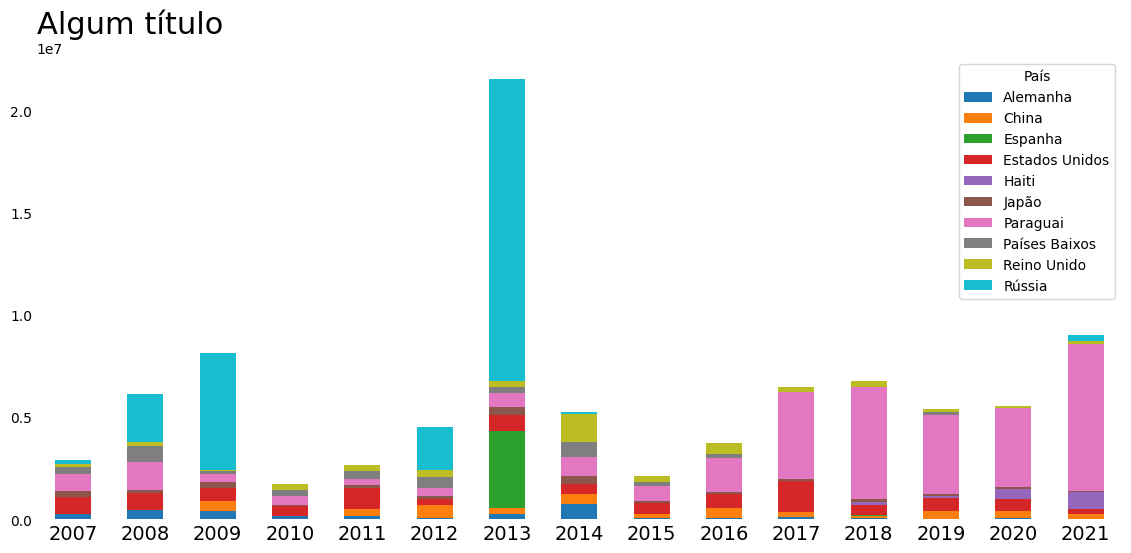

In [63]:
# Gerando o gráfico de colunas empilhadas
ax = top10_ano_empilhado.plot(kind="bar", stacked=True, figsize=(14,6))

# Personalizando o gráfico
ax.set_title('Algum título', loc='left', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which ="both", length=0)

plt.show()

## Ideias de texto para o Storytelling dos dados


Bem-vindos ao nosso relatório acerca das **exportações de vinhos de mesa** no Brasil!

Trazemos aqui dados dos últimos **15 anos (2007 - 2021)** da exportação de vinhos brasileiros de nossa vinícola parceira a fim de suportar a nossa análise do porquê vocês devem investir em **Vinhos Bra SA** como uma empresa com potencial na exportação de vinhos de mesa no Brasil.

Nesta apresentação, abordarei a quantidade de vinhos exportados e os fatores externos que podem impactar nossas análises. (*se a gente tiver algum dado de fator externo para colocar na análise*)

Vamos dividir as nossas análises em dois níveis com os dados que possuímos: 
- Países que mais importam os nossos vinhos
- Continentes com maior participação na importação dos vinhos.

Começando com os números, nos últimos anos, temos observado um crescimento consistente nas exportações de vinhos brasileiros. (*criar gráfico de vendas por ano e juntar com o de vendas por país por ano*)

De acordo com nossos relatórios, houve um aumento nas vendas em relação ... (*Será que é possível gerarmos gráficos de crescimento de 5 em 5 anos aqui, seriam três pontos... acho que um gráfico de inclinação pode mostrar isso* )  ao mesmo período do ano anterior. Países como .... (*adicionar os países mais importantes*) tem uma relevância significativa nas importações dos vinhos brasileiros. 

Podemos notar por exemplo, no ano de ... que a Rússia importou ..., isto pode ser ...
O maior importador de nossos vinhos é o Paraguai (*colocar em números*) e nos últimos ... anos exportamos mais de ... vinhos (*pode ser em valor ou quantidade*) 

Isso indica uma demanda crescente pelos nossos produtos, refletindo a qualidade dos vinhos brasileiros e a crescente reputação que estamos conquistando no mercado internacional, sobretudo nos parceiros abaixo...(*apontar para o gráfico de distirbuição dos principais parceiros*).

No entanto, é importante ressaltar que há fatores externos que podem influenciar nossas análises e o desempenho futuro. Um desses fatores é a ... (*falar de imprevisibilidade de demanda ou demandas não recorrentes e como fidelizá-las*). Flutuações nas taxas de câmbio também podem impactar os preços de exportação e a competitividade dos nossos produtos em relação a outras opções disponíveis no mercado global. Portanto, é essencial monitorar de perto as tendências cambiais e ajustar nossas estratégias de precificação conforme necessário.

Outro fator a ser considerado é o ambiente regulatório e político nos mercados de destino (*investigar se podemos adicionar coisas relativas à países que não consomem ou alteraram bruscamente o consumo de nossos vinhos*). Alterações nas políticas comerciais, impostos de importação ou regulamentações sanitárias podem ter um impacto significativo nas nossas operações e no acesso aos mercados internacionais. Devemos estar atentos a essas mudanças e trabalhar em estreita colaboração com as autoridades competentes para garantir o cumprimento das normas e minimizar qualquer impacto negativo.

Além disso, as condições climáticas também podem influenciar a produção de uvas e, consequentemente, a quantidade de vinhos disponíveis para exportação. Mudanças no clima, como períodos de seca ou chuvas excessivas, podem afetar a qualidade e a quantidade da colheita, afetando a disponibilidade dos nossos produtos. É fundamental acompanhar os relatórios climáticos e ajustar nossa produção e planejamento de exportação conforme necessário. (*só se puxarmos dados climáticos*)

Para concluir, temos registrado um crescimento promissor nas exportações de vinhos brasileiros e estamoa atentos aos fatores externos que podem influenciar nossas análises e o desempenho futuro. Como empresa, estamos comprometidos em monitorar essas variáveis de perto, implementar estratégias de mitigação de risco e aproveitar as oportunidades que surgirem.

Obrigado pela atenção e estou à disposição para responder a quaisquer perguntas que possam surgir.